# Libraries

In [1]:
#Core Libraries for Data Explorer
import pandas as pd

#Scientific computing
import numpy as np

# Graphs Libraries
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# Statistical Libraries
import scipy
from scipy import stats

#################################
#Machine Learning (ML) Libraries#
#################################
import sklearn

# Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Modelling
from catboost import CatBoostClassifier

# Evaluation
from sklearn.metrics import jaccard_score

#Ignore Some Unuseful Warnings
import warnings
warnings.filterwarnings("ignore")

* Libraries Version 

In [2]:
print(f"Pandas Version: {pd.__version__} \n ----")
print(f"Numpy Version: {np.__version__}\n ----")
print(f"Seaborn Version: {sns.__version__}\n ----")
print(f"Matplotlib Version: {matplotlib.__version__}\n ----")
print(f"Stats Version: {scipy.__version__}\n ----")
print(f"Sckitlearn Verison: {sklearn.__version__}")

Pandas Version: 2.1.1 
 ----
Numpy Version: 1.26.0
 ----
Seaborn Version: 0.13.0
 ----
Matplotlib Version: 3.8.0
 ----
Stats Version: 1.11.3
 ----
Sckitlearn Verison: 1.3.1


---

In [4]:
train_df = pd.read_parquet("kagglefile/train_final.parquet")
train_df.head()

,id,month,n_seconds_1,n_seconds_2,n_seconds_3,carrier,devicebrand,feature_0,feature_1,feature_2,...,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
0,5beefd4d2bf4a4767e0df8108,10,5245.571,981.182,205.948,VODAFONE TR,Apple,-1.197737,1.113360,-1.123334,...,-2.613336,-2.032903,2.645719,-1.023478,1.658986,-1.559406,-2.161336,30,58,"menu2, menu4, menu5"
1,867285b116c063d5a8482f5be,10,5184.876,557.650,487.587,TURKCELL,samsung,-2.336352,2.567766,-0.494908,...,-0.983938,-1.453756,-0.021547,-0.195770,2.775513,-0.318980,-4.291473,21,45,"menu7, menu8, menu4"
2,c82a7cbd2e00d9b66c06bcadc,10,3835.618,3275.128,43.806,TURK TELEKOM,Redmi,-2.561455,2.061736,-0.184511,...,-1.668703,-3.599403,1.673868,0.631790,1.293131,-2.230909,-2.383524,19,61,"menu2, menu8, menu4"
3,f2d2b25073ccc298eced86897,10,3532.544,154.509,64.724,TURKCELL,samsung,-2.529918,3.358050,-0.851366,...,-1.861418,-1.219658,1.863495,0.213170,1.029710,-1.142185,-4.466191,2,41,"menu6, menu2, menu1"
4,7818c92a58af0f2cb7c361738,10,3344.192,787.896,715.115,VODAFONE TR,samsung,-2.922361,2.096124,0.060796,...,-0.142903,-1.875545,1.024499,-0.186423,-0.061626,-1.462175,-2.371206,23,85,"menu6, menu2, menu8"


In [5]:
test_df = pd.read_parquet("kagglefile/test_final.parquet")
test_df.head()

,id,month,n_seconds_1,n_seconds_2,n_seconds_3,carrier,devicebrand,feature_0,feature_1,feature_2,...,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
0,2e6105f5911256f4f6c4813ed,1,6893.544,246.854,242.636,VODAFONE TR,samsung,-1.723524,3.216489,-1.138474,...,-1.094519,-1.217407,-4.280456,1.512240,-2.306445,2.066388,0.844927,-1.026193,18,58
1,c56ad71dae0a5dbd3e7d36adc,1,4481.065,740.209,263.860,TURKCELL,Apple,-0.417275,2.024433,0.102952,...,1.806486,-3.477517,-2.064966,1.499805,1.284697,0.189269,-1.563224,-1.901654,3,35
2,4d02ea175f6581f0c6385311f,1,4340.702,2742.163,318.700,TURKCELL,samsung,-2.943294,2.769536,0.734942,...,1.759080,-2.038839,-2.067219,2.141083,0.055355,0.084739,-1.009925,-2.058473,7,50
3,3412d27a86c286ba078fa935c,1,4129.666,181.397,155.423,TURK TELEKOM,Apple,-2.346902,2.684752,0.168206,...,2.171847,-0.925040,-1.484278,0.666036,0.911519,0.616167,0.092304,-1.874706,22,47
4,0203b561f6f7e10eafa46eefa,1,3903.944,126.133,100.060,TURKCELL,POCO,-1.745354,2.355863,0.318961,...,-0.373413,-0.015773,-2.961445,1.301413,1.375090,-0.107355,0.924390,-1.606419,29,52


# Exploratory Data Analysis

In [6]:
def summary(self):
    start_mememory = self.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB \n ---'.format(start_mememory))
    
    row = self.shape[0]
    print(f"Total of Rows within one column: {row} \n ---")
    
    column = self.shape[1]
    print(f"Total of Columns: {column} \n ---")

    
    self_null = self.isnull().sum().sum()     #Sum of Columns inculidng Nan
    print(f"Nan Values Including total of Column: {self_null} \n ---")

    Rows_duplicate = len(self)-len(self.drop_duplicates()) #count number of duplicate in Dataframe

    print(f"All Rows Duplicate Count: {Rows_duplicate} \n ---")

    columnnames = pd.DataFrame(self.dtypes).reset_index()
    numerical_column_list_float = columnnames[columnnames[0] == "float64"]["index"].to_list()
    numerical_column_list_int = columnnames[columnnames[0] == "int64"]["index"].to_list()
    numerical_column_list = numerical_column_list_float
    numerical_column_list.extend(numerical_column_list_int)
    
    sumofnumerical_columns_list = len(numerical_column_list_float) + len(numerical_column_list_int)
    string_column_list = columnnames[columnnames[0] == "object"]["index"].to_list()
    sumofstring_column_list = len(string_column_list)

    print(f"Numerical Column Names {numerical_column_list} \n ---")
    print(f"Sum Of numerical columns are {sumofnumerical_columns_list} \n ---")
    print(f"String Column Names {string_column_list} \n ---")
    print(f"Sum of string columns are {sumofstring_column_list} \n ---")

    zero = (self == 0.00).astype(int).sum(axis = 0).sum()

    print(f"All zero numbers total is {zero}")

* Train Data Set

In [7]:
summary(train_df)

Memory usage of dataframe is 41.62 MB 
 ---
Total of Rows within one column: 94049 
 ---
Total of Columns: 58 
 ---
Nan Values Including total of Column: 0 
 ---
All Rows Duplicate Count: 0 
 ---
Numerical Column Names ['n_seconds_1', 'n_seconds_2', 'n_seconds_3', 'feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19', 'feature_20', 'feature_21', 'feature_22', 'feature_23', 'feature_24', 'feature_25', 'feature_26', 'feature_27', 'feature_28', 'feature_29', 'feature_30', 'feature_31', 'feature_32', 'feature_33', 'feature_34', 'feature_35', 'feature_36', 'feature_37', 'feature_38', 'feature_39', 'feature_40', 'feature_41', 'feature_42', 'feature_43', 'feature_44', 'feature_45', 'feature_46', 'feature_47', 'month', 'feature_48', 'feature_49'] 
 ---
Sum Of numerical columns are 5

* Test Data Set

In [8]:
summary(test_df)

Memory usage of dataframe is 5.20 MB 
 ---
Total of Rows within one column: 11955 
 ---
Total of Columns: 57 
 ---
Nan Values Including total of Column: 0 
 ---
All Rows Duplicate Count: 0 
 ---
Numerical Column Names ['n_seconds_1', 'n_seconds_2', 'n_seconds_3', 'feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19', 'feature_20', 'feature_21', 'feature_22', 'feature_23', 'feature_24', 'feature_25', 'feature_26', 'feature_27', 'feature_28', 'feature_29', 'feature_30', 'feature_31', 'feature_32', 'feature_33', 'feature_34', 'feature_35', 'feature_36', 'feature_37', 'feature_38', 'feature_39', 'feature_40', 'feature_41', 'feature_42', 'feature_43', 'feature_44', 'feature_45', 'feature_46', 'feature_47', 'month', 'feature_48', 'feature_49'] 
 ---
Sum Of numerical columns are 57

**Statistical Summary of Numericla Columns (feat_)**

In [9]:
train_feat = train_df.iloc[:,7:]
train_feat_summary = train_feat.describe()
train_feat_summary

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
count,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,...,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000,94049.000000
mean,-1.824932,1.948002,-0.014231,-0.270988,3.428983,2.314612,0.755425,0.548228,0.833412,-3.767522,...,1.055930,-1.247314,-1.863433,1.042226,0.260601,0.737817,-0.683078,-2.333848,20.531978,50.843943
std,0.706014,0.742521,0.855615,1.001878,0.886168,0.765429,0.693982,0.661974,0.841732,0.889535,...,0.745859,0.767093,0.812613,0.910212,0.797621,0.837250,0.858325,0.642435,8.310330,12.950021
min,-5.009604,-1.190684,-4.988702,-4.205721,-2.057158,-1.572397,-4.834940,-2.195450,-3.326162,-8.526143,...,-3.565546,-4.956211,-6.151754,-3.265827,-3.735571,-3.631153,-4.166801,-5.680349,1.000000,20.000000
25%,-2.290048,1.443627,-0.560076,-0.950880,2.891524,1.805311,0.325458,0.105707,0.273083,-4.336629,...,0.587355,-1.736227,-2.396253,0.431905,-0.252991,0.161747,-1.279131,-2.753271,15.000000,41.000000
50%,-1.840876,1.934019,0.005703,-0.337732,3.503459,2.316267,0.789183,0.522654,0.778152,-3.710846,...,1.093342,-1.219592,-1.865288,1.037332,0.285148,0.703326,-0.703813,-2.327645,21.000000,50.000000
75%,-1.379623,2.431059,0.559322,0.330430,4.050990,2.825116,1.221263,0.957651,1.324529,-3.136567,...,1.565953,-0.732870,-1.333491,1.648791,0.798862,1.276491,-0.112671,-1.909460,26.000000,60.000000
max,2.137354,6.574112,4.055067,5.021944,6.272530,5.775909,3.906580,4.728841,6.257297,-0.740511,...,3.869422,2.830491,3.225738,5.322931,3.825793,5.147134,3.483374,1.401900,68.000000,102.000000


In [10]:
test_feat = test_df.iloc[:,7:]
test_feat_summary = test_feat.describe()
test_feat_summary

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
count,11955.000000,11955.000000,11955.000000,11955.000000,11955.000000,11955.000000,11955.000000,11955.000000,11955.000000,11955.000000,...,11955.000000,11955.000000,11955.000000,11955.000000,11955.000000,11955.000000,11955.000000,11955.000000,11955.000000,11955.000000
mean,-1.798281,2.031999,0.016078,-0.228809,3.388417,2.504509,0.680192,0.559495,1.055679,-3.748254,...,1.129112,-1.217364,-1.888709,1.170828,0.307357,0.525849,-0.653697,-2.325561,20.705897,51.926809
std,0.701532,0.736496,0.811839,0.969308,0.860674,0.746671,0.682653,0.653672,0.811264,0.884864,...,0.723230,0.748210,0.770272,0.890796,0.756098,0.785094,0.881584,0.635836,8.532393,13.489314
min,-4.661205,-0.644043,-3.622096,-3.502686,-1.246851,-0.923135,-2.748580,-1.903355,-1.451831,-7.495743,...,-2.375533,-4.559577,-4.951508,-2.741043,-2.919687,-2.621063,-3.900280,-4.877974,1.000000,20.000000
25%,-2.263956,1.533961,-0.508738,-0.885191,2.856143,2.006101,0.250019,0.122828,0.506892,-4.319155,...,0.667405,-1.687849,-2.386102,0.572045,-0.165157,-0.012304,-1.277870,-2.734042,15.000000,42.000000
50%,-1.818060,2.018876,0.032225,-0.299804,3.468259,2.506612,0.713269,0.528414,0.996646,-3.695034,...,1.162207,-1.191842,-1.877581,1.162670,0.336571,0.486935,-0.678628,-2.317191,21.000000,52.000000
75%,-1.354536,2.513030,0.560742,0.344927,4.003024,3.006767,1.140305,0.959055,1.538137,-3.116774,...,1.618368,-0.713985,-1.379019,1.756029,0.820697,1.032607,-0.064143,-1.900650,26.000000,62.000000
max,1.732834,5.631462,3.226902,4.423759,6.150035,5.786079,3.764694,4.096988,5.933809,-0.722245,...,4.013640,2.312557,1.264682,4.737519,3.021117,3.744252,3.133499,0.618178,57.000000,100.000000


**Target (Class) Column Observation**

In [11]:
target = train_df["target"]
target

0        menu2, menu4, menu5
1        menu7, menu8, menu4
2        menu2, menu8, menu4
3        menu6, menu2, menu1
4        menu6, menu2, menu8
                ...         
94044    menu2, menu8, menu4
94045    menu9, menu2, menu5
94046    menu6, menu2, menu4
94047    menu6, menu8, menu4
94048    menu6, menu2, menu8
Name: target, Length: 94049, dtype: object

# Outliers

* Train Data Set

In [12]:
Columns_feat_train = train_df.iloc[:,7:]
Feats_outlier_data = Columns_feat_train 
Feats_outlier_data.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
0,-1.197737,1.113360,-1.123334,-0.263580,2.161242,2.651375,0.810021,1.516175,2.351266,-4.607631,...,-2.613336,-2.032903,2.645719,-1.023478,1.658986,-1.559406,-2.161336,30,58,"menu2, menu4, menu5"
1,-2.336352,2.567766,-0.494908,0.949101,3.567557,3.357848,0.434091,0.885814,1.451937,-3.183905,...,-0.983938,-1.453756,-0.021547,-0.195770,2.775513,-0.318980,-4.291473,21,45,"menu7, menu8, menu4"
2,-2.561455,2.061736,-0.184511,1.062306,4.197788,1.551181,-0.596218,-0.618501,2.017303,-4.631071,...,-1.668703,-3.599403,1.673868,0.631790,1.293131,-2.230909,-2.383524,19,61,"menu2, menu8, menu4"
3,-2.529918,3.358050,-0.851366,1.643876,2.849205,3.887427,1.854521,0.988186,2.065699,-5.803766,...,-1.861418,-1.219658,1.863495,0.213170,1.029710,-1.142185,-4.466191,2,41,"menu6, menu2, menu1"
4,-2.922361,2.096124,0.060796,-1.487557,3.224788,2.091947,-0.992961,0.686043,2.089750,-2.974129,...,-0.142903,-1.875545,1.024499,-0.186423,-0.061626,-1.462175,-2.371206,23,85,"menu6, menu2, menu8"


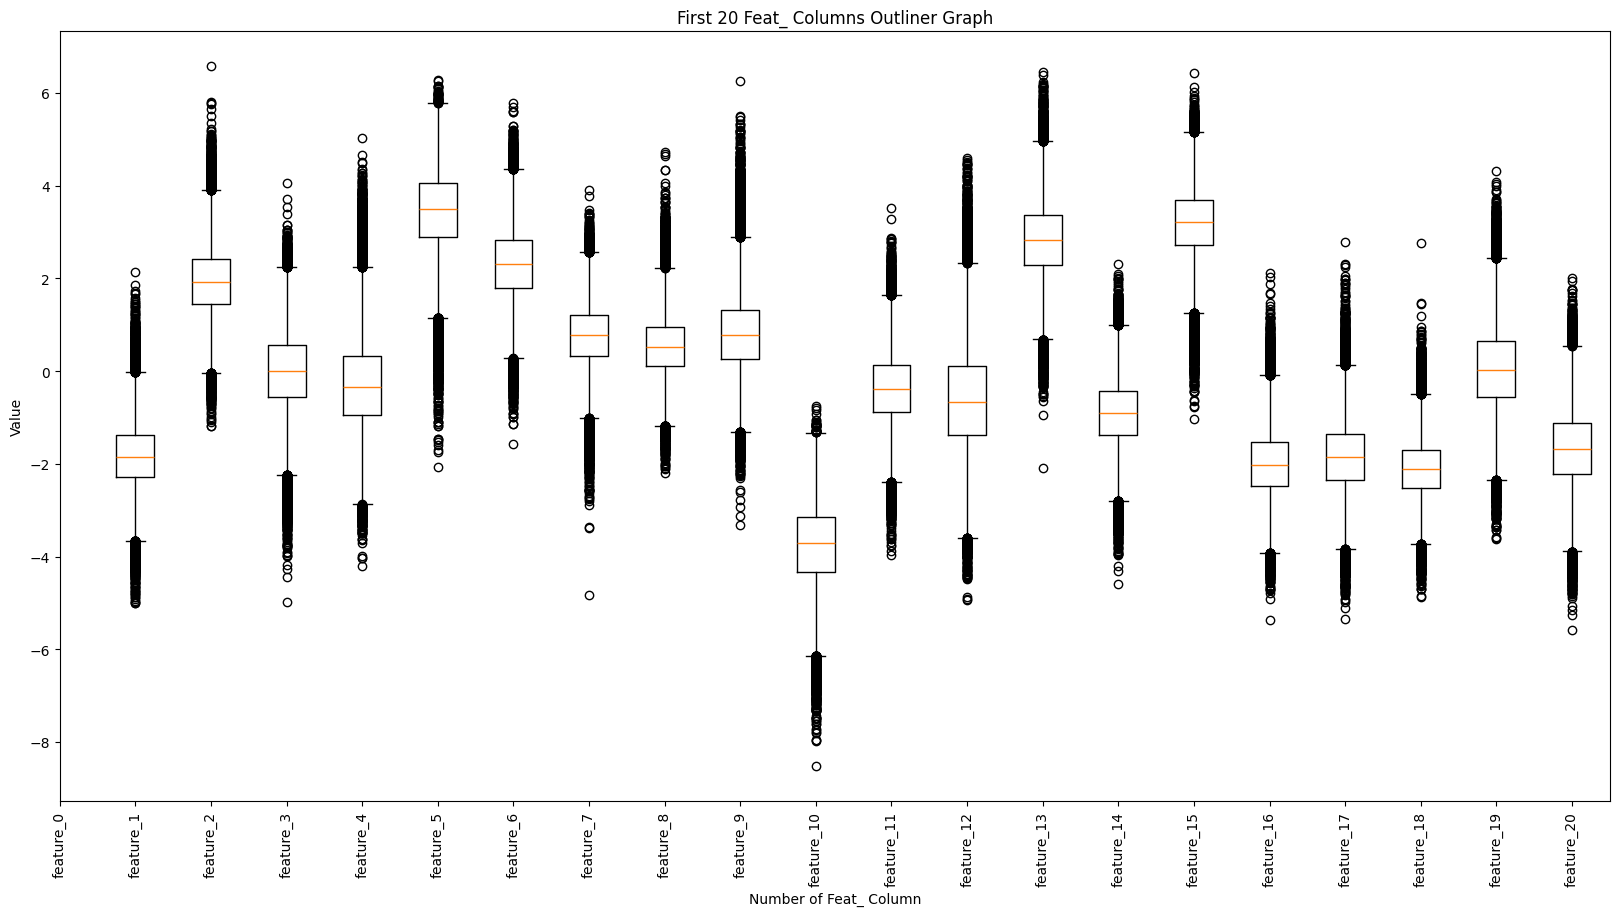

In [13]:
Columns_name_feat_train = Columns_feat_train.columns

plt.figure(figsize =(20,10))
plt.boxplot(Feats_outlier_data.iloc[:,:20])
plt.title("First 20 Feat_ Columns Outliner Graph")
plt.xlabel("Number of Feat_ Column")
plt.ylabel("Value")
plt.xticks(range(len(Columns_name_feat_train[:21])), Columns_name_feat_train[:21],rotation='vertical')
plt.show()

Find and remove to outliers for main data set

In [14]:
# Creating New Dataframe for Outliers

No_Outlier_train_df = train_df.copy()
No_Outlier_train_df = No_Outlier_train_df[(np.abs(stats.zscore(No_Outlier_train_df.iloc[:,7:-1])) < 3).all(axis=1)] # Z-score method
No_Outlier_train_df = No_Outlier_train_df.reset_index(drop=True)

print(f"Sum of Rows: {No_Outlier_train_df.shape[0]} -- old is {train_df.shape[0]} ")
print(f"Sum of Columns: {No_Outlier_train_df.shape[1]} -- old is {train_df.shape[1]}")

No_Outlier_train_df

Sum of Rows: 80935 -- old is 94049 
Sum of Columns: 58 -- old is 58


,id,month,n_seconds_1,n_seconds_2,n_seconds_3,carrier,devicebrand,feature_0,feature_1,feature_2,...,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
0,5beefd4d2bf4a4767e0df8108,10,5245.571,981.182,205.948,VODAFONE TR,Apple,-1.197737,1.113360,-1.123334,...,-2.613336,-2.032903,2.645719,-1.023478,1.658986,-1.559406,-2.161336,30,58,"menu2, menu4, menu5"
1,c82a7cbd2e00d9b66c06bcadc,10,3835.618,3275.128,43.806,TURK TELEKOM,Redmi,-2.561455,2.061736,-0.184511,...,-1.668703,-3.599403,1.673868,0.631790,1.293131,-2.230909,-2.383524,19,61,"menu2, menu8, menu4"
2,7818c92a58af0f2cb7c361738,10,3344.192,787.896,715.115,VODAFONE TR,samsung,-2.922361,2.096124,0.060796,...,-0.142903,-1.875545,1.024499,-0.186423,-0.061626,-1.462175,-2.371206,23,85,"menu6, menu2, menu8"
3,08773130c89b00852a36a6c5b,10,3011.760,1929.067,1183.204,TURKCELL,samsung,-1.703797,1.908199,0.647938,...,-1.471882,-2.144270,-0.685794,0.284769,2.492420,1.226833,-2.875185,18,70,"menu6, menu2, menu9"
4,5a0e7b559d8ca4fca42a99f1f,10,2996.122,511.165,154.459,TURKCELL,HUAWEI,-3.272534,2.331860,0.451077,...,-1.084344,-0.337246,1.198556,-0.222607,0.879586,-0.183779,-2.499642,29,49,"menu2, menu1, menu8"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80930,a00027a3e75850e749b8cd3c1,12,44.762,43.118,42.385,TURKCELL,HUAWEI,-1.723296,0.736321,0.127670,...,-1.507826,-2.044353,1.180325,0.035446,-0.101889,-1.676777,-1.412156,25,56,"menu9, menu3, menu4"
80931,2e54f32ced9fae6ef802ceaa2,12,44.397,43.425,41.678,O2 - DE,HUAWEI,-1.531534,2.596604,0.340233,...,-1.484154,-1.988186,0.044385,0.863442,0.761354,1.073711,-3.560019,29,68,"menu2, menu8, menu4"
80932,6aa4ff0f6cc5ef4c2980b2862,12,44.331,43.977,40.620,TURKCELL,samsung,-1.268987,2.300487,0.231711,...,-0.632773,-1.624605,2.406462,-0.340132,-0.893553,-2.061401,-1.908158,25,43,"menu9, menu2, menu5"
80933,db8f55b8499f8d8c05148240e,12,43.963,43.350,40.862,TURK TELEKOM,Redmi,-2.389140,2.358281,0.683524,...,-0.186062,-2.329308,0.864857,1.284815,-0.100755,-1.056479,-1.452037,25,60,"menu6, menu8, menu4"


In [15]:
carrier = No_Outlier_train_df["carrier"].value_counts()
carrier = carrier.index.to_list()

# Create a mapping dictionary
string_to_integer_carrier = {string: index + 1 for index, string in enumerate(carrier)}

carrier_df = No_Outlier_train_df[["carrier"]]

# Apply the mapping to the pd.Series
No_Outlier_train_df["carrier"] = carrier_df["carrier"].map(string_to_integer_carrier)

No_Outlier_train_df.head()

,id,month,n_seconds_1,n_seconds_2,n_seconds_3,carrier,devicebrand,feature_0,feature_1,feature_2,...,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
0,5beefd4d2bf4a4767e0df8108,10,5245.571,981.182,205.948,2,Apple,-1.197737,1.113360,-1.123334,...,-2.613336,-2.032903,2.645719,-1.023478,1.658986,-1.559406,-2.161336,30,58,"menu2, menu4, menu5"
1,c82a7cbd2e00d9b66c06bcadc,10,3835.618,3275.128,43.806,3,Redmi,-2.561455,2.061736,-0.184511,...,-1.668703,-3.599403,1.673868,0.631790,1.293131,-2.230909,-2.383524,19,61,"menu2, menu8, menu4"
2,7818c92a58af0f2cb7c361738,10,3344.192,787.896,715.115,2,samsung,-2.922361,2.096124,0.060796,...,-0.142903,-1.875545,1.024499,-0.186423,-0.061626,-1.462175,-2.371206,23,85,"menu6, menu2, menu8"
3,08773130c89b00852a36a6c5b,10,3011.760,1929.067,1183.204,1,samsung,-1.703797,1.908199,0.647938,...,-1.471882,-2.144270,-0.685794,0.284769,2.492420,1.226833,-2.875185,18,70,"menu6, menu2, menu9"
4,5a0e7b559d8ca4fca42a99f1f,10,2996.122,511.165,154.459,1,HUAWEI,-3.272534,2.331860,0.451077,...,-1.084344,-0.337246,1.198556,-0.222607,0.879586,-0.183779,-2.499642,29,49,"menu2, menu1, menu8"


In [16]:
devicebrand = No_Outlier_train_df["devicebrand"].value_counts()
devicebrand = devicebrand.index.to_list()

# Create a mapping dictionary
string_to_integer_devicebrand = {string: index + 1 for index, string in enumerate(devicebrand)}

devicebrand_df = No_Outlier_train_df[["devicebrand"]]

# Apply the mapping to the pd.Series
No_Outlier_train_df["devicebrand"] = devicebrand_df["devicebrand"].map(string_to_integer_devicebrand)

No_Outlier_train_df.head()

,id,month,n_seconds_1,n_seconds_2,n_seconds_3,carrier,devicebrand,feature_0,feature_1,feature_2,...,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
0,5beefd4d2bf4a4767e0df8108,10,5245.571,981.182,205.948,2,1,-1.197737,1.113360,-1.123334,...,-2.613336,-2.032903,2.645719,-1.023478,1.658986,-1.559406,-2.161336,30,58,"menu2, menu4, menu5"
1,c82a7cbd2e00d9b66c06bcadc,10,3835.618,3275.128,43.806,3,3,-2.561455,2.061736,-0.184511,...,-1.668703,-3.599403,1.673868,0.631790,1.293131,-2.230909,-2.383524,19,61,"menu2, menu8, menu4"
2,7818c92a58af0f2cb7c361738,10,3344.192,787.896,715.115,2,2,-2.922361,2.096124,0.060796,...,-0.142903,-1.875545,1.024499,-0.186423,-0.061626,-1.462175,-2.371206,23,85,"menu6, menu2, menu8"
3,08773130c89b00852a36a6c5b,10,3011.760,1929.067,1183.204,1,2,-1.703797,1.908199,0.647938,...,-1.471882,-2.144270,-0.685794,0.284769,2.492420,1.226833,-2.875185,18,70,"menu6, menu2, menu9"
4,5a0e7b559d8ca4fca42a99f1f,10,2996.122,511.165,154.459,1,4,-3.272534,2.331860,0.451077,...,-1.084344,-0.337246,1.198556,-0.222607,0.879586,-0.183779,-2.499642,29,49,"menu2, menu1, menu8"


## Feature selection

In [17]:
# Creating New Dataframe for Machine Learning Algorithm

X = No_Outlier_train_df.iloc[:,1:-1]  # X is numerical Value
display(X)

y = No_Outlier_train_df['target']
display(y)

,month,n_seconds_1,n_seconds_2,n_seconds_3,carrier,devicebrand,feature_0,feature_1,feature_2,feature_3,...,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
0,10,5245.571,981.182,205.948,2,1,-1.197737,1.113360,-1.123334,-0.263580,...,0.930440,-2.613336,-2.032903,2.645719,-1.023478,1.658986,-1.559406,-2.161336,30,58
1,10,3835.618,3275.128,43.806,3,3,-2.561455,2.061736,-0.184511,1.062306,...,1.056681,-1.668703,-3.599403,1.673868,0.631790,1.293131,-2.230909,-2.383524,19,61
2,10,3344.192,787.896,715.115,2,2,-2.922361,2.096124,0.060796,-1.487557,...,2.188403,-0.142903,-1.875545,1.024499,-0.186423,-0.061626,-1.462175,-2.371206,23,85
3,10,3011.760,1929.067,1183.204,1,2,-1.703797,1.908199,0.647938,-2.648655,...,1.520361,-1.471882,-2.144270,-0.685794,0.284769,2.492420,1.226833,-2.875185,18,70
4,10,2996.122,511.165,154.459,1,4,-3.272534,2.331860,0.451077,-0.843389,...,2.264790,-1.084344,-0.337246,1.198556,-0.222607,0.879586,-0.183779,-2.499642,29,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80930,12,44.762,43.118,42.385,1,4,-1.723296,0.736321,0.127670,-0.049003,...,1.388295,-1.507826,-2.044353,1.180325,0.035446,-0.101889,-1.676777,-1.412156,25,56
80931,12,44.397,43.425,41.678,26,4,-1.531534,2.596604,0.340233,-1.149720,...,1.259206,-1.484154,-1.988186,0.044385,0.863442,0.761354,1.073711,-3.560019,29,68
80932,12,44.331,43.977,40.620,1,2,-1.268987,2.300487,0.231711,0.741582,...,1.067127,-0.632773,-1.624605,2.406462,-0.340132,-0.893553,-2.061401,-1.908158,25,43
80933,12,43.963,43.350,40.862,3,3,-2.389140,2.358281,0.683524,0.234449,...,1.976830,-0.186062,-2.329308,0.864857,1.284815,-0.100755,-1.056479,-1.452037,25,60


0        menu2, menu4, menu5
1        menu2, menu8, menu4
2        menu6, menu2, menu8
3        menu6, menu2, menu9
4        menu2, menu1, menu8
                ...         
80930    menu9, menu3, menu4
80931    menu2, menu8, menu4
80932    menu9, menu2, menu5
80933    menu6, menu8, menu4
80934    menu6, menu2, menu8
Name: target, Length: 80935, dtype: object

In [18]:
#Univariate feature selection
X_new = SelectKBest(f_classif, k="all").fit(np.array(X), np.array(y))
X_new

SelectKBest(k='all')

In [19]:
dfscores = pd.DataFrame(X_new.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization
 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

print(featureScores.nlargest(54,'Score'))  #print 10best features

_54 = featureScores.nlargest(54,'Score')
_54_spec = _54["Specs"].to_list()

          Specs      Score
1   n_seconds_1  50.421460
32   feature_26  47.650306
17   feature_11  41.857855
27   feature_21  39.453823
35   feature_29  37.509867
37   feature_31  37.304232
0         month  35.593409
16   feature_10  34.474600
2   n_seconds_2  33.710192
31   feature_25  32.871634
6     feature_0  29.020932
24   feature_18  28.915003
55   feature_49  28.325034
15    feature_9  26.102761
18   feature_12  25.294751
22   feature_16  24.105571
9     feature_3  21.436143
25   feature_19  21.302188
49   feature_43  20.262642
54   feature_48  18.070059
43   feature_37  16.726284
12    feature_6  16.631581
7     feature_1  15.202682
20   feature_14  14.872283
26   feature_20  14.746258
46   feature_40  14.483935
11    feature_5  13.994615
44   feature_38  13.805206
41   feature_35  13.638381
50   feature_44  12.860643
10    feature_4  12.508803
28   feature_22  12.231274
29   feature_23  12.083656
14    feature_8  10.914343
33   feature_27  10.509391
3   n_seconds_3  10.508450
1

In [20]:
feature_bar_df = pd.DataFrame(_54)
feature_bar_df = feature_bar_df.iloc[::-1]
feature_bar_df.head()

,Specs,Score
45,feature_39,3.370601
8,feature_2,6.147771
42,feature_36,6.359499
52,feature_46,6.420752
51,feature_45,6.460537


Text(0.5, 1.0, 'Features Selection')

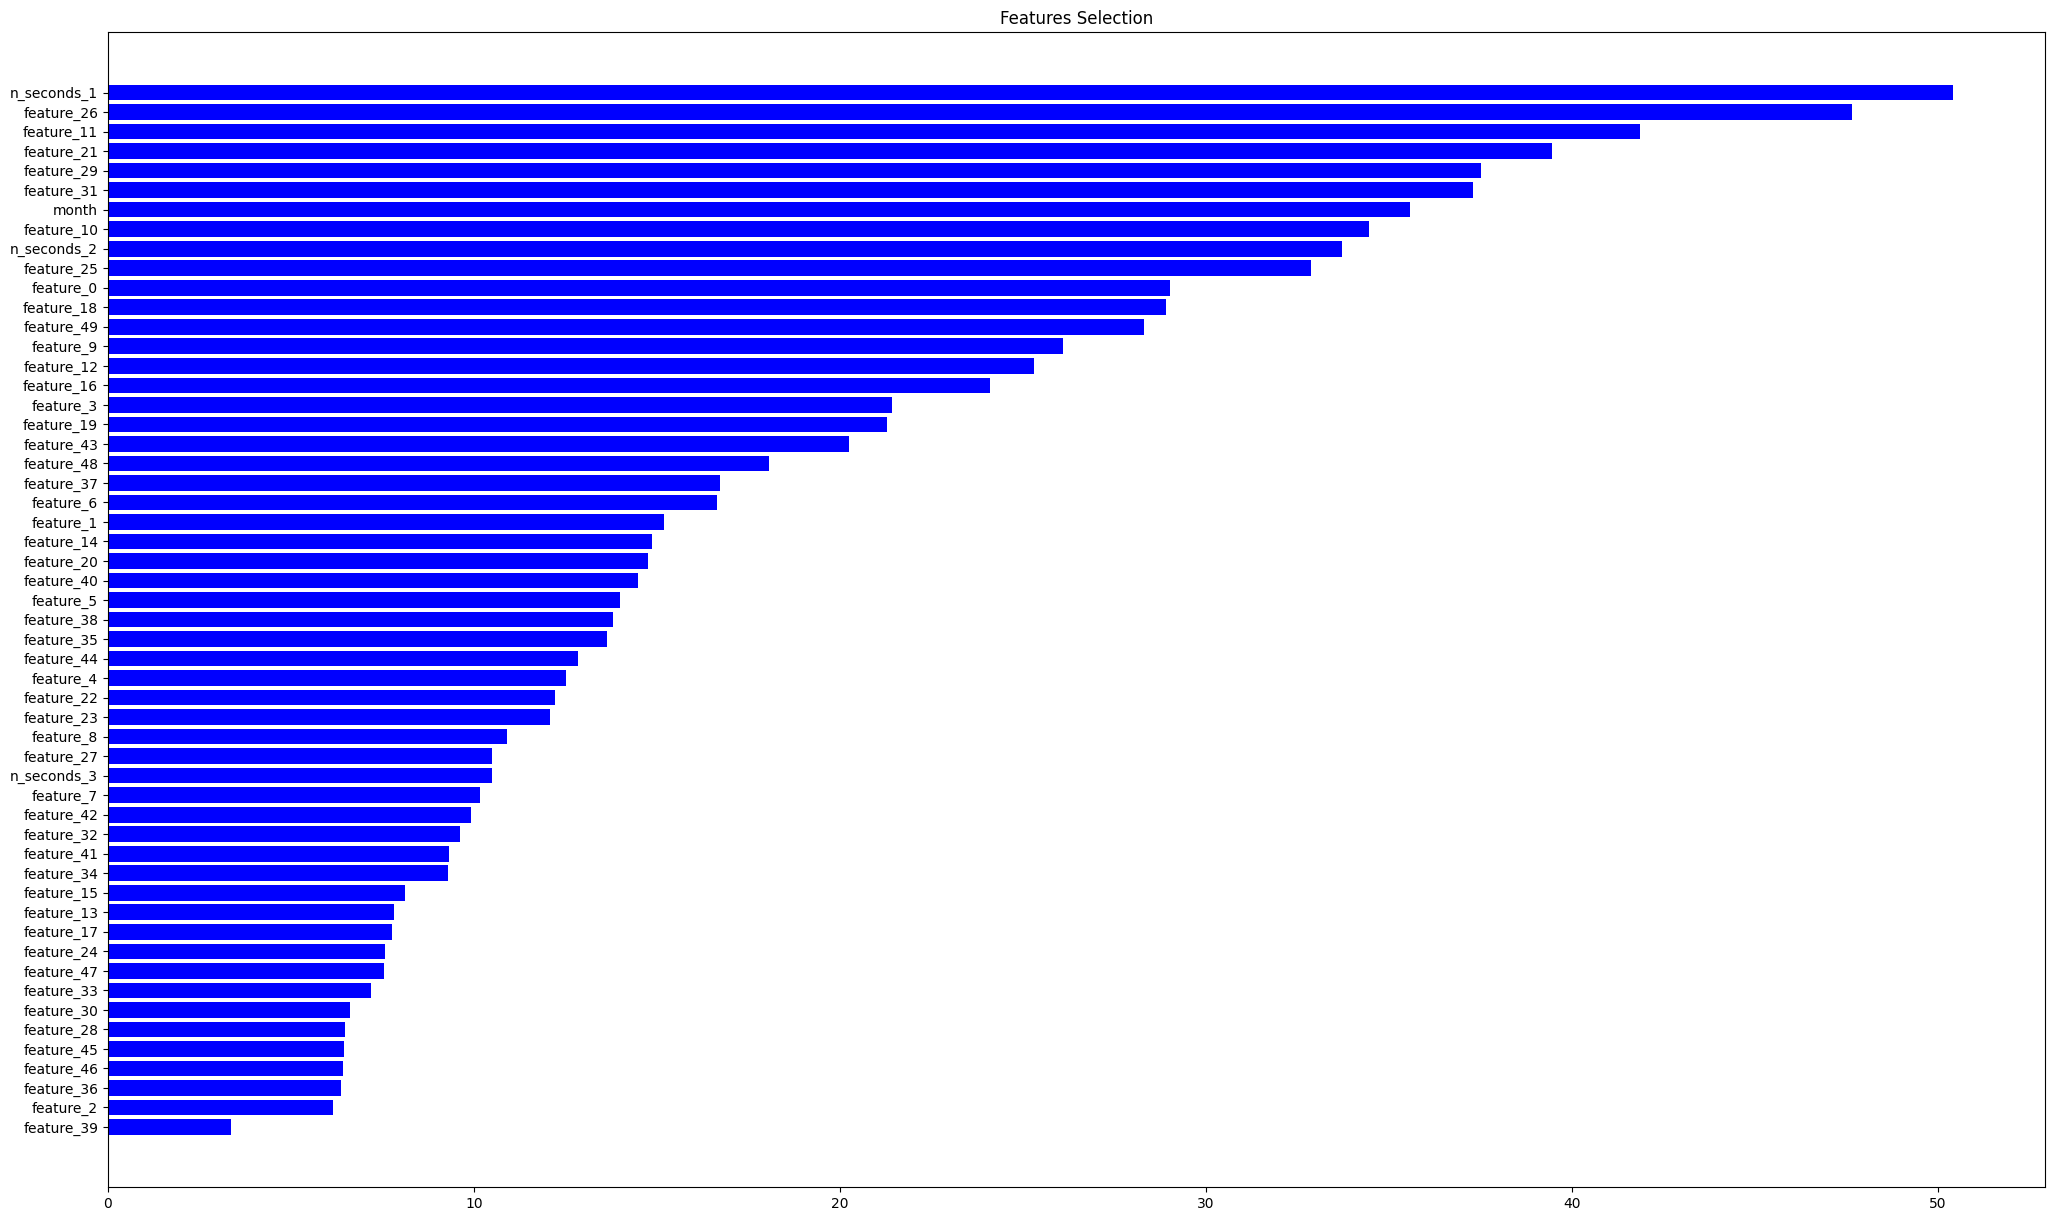

In [21]:
plt.figure(figsize=(25,15))
plt.barh(feature_bar_df["Specs"],feature_bar_df["Score"], color = "b")
plt.title("Features Selection")

In [22]:
# Creating New X valu for ML 
feat_df = No_Outlier_train_df[_54_spec]
feat_df_col = feat_df.columns
feat_df_col

Index(['n_seconds_1', 'feature_26', 'feature_11', 'feature_21', 'feature_29',
       'feature_31', 'month', 'feature_10', 'n_seconds_2', 'feature_25',
       'feature_0', 'feature_18', 'feature_49', 'feature_9', 'feature_12',
       'feature_16', 'feature_3', 'feature_19', 'feature_43', 'feature_48',
       'feature_37', 'feature_6', 'feature_1', 'feature_14', 'feature_20',
       'feature_40', 'feature_5', 'feature_38', 'feature_35', 'feature_44',
       'feature_4', 'feature_22', 'feature_23', 'feature_8', 'feature_27',
       'n_seconds_3', 'feature_7', 'feature_42', 'feature_32', 'feature_41',
       'feature_34', 'feature_15', 'feature_13', 'feature_17', 'feature_24',
       'feature_47', 'feature_33', 'feature_30', 'feature_28', 'feature_45',
       'feature_46', 'feature_36', 'feature_2', 'feature_39'],
      dtype='object')

In [23]:
No_Outlier_train_df.columns

Index(['id', 'month', 'n_seconds_1', 'n_seconds_2', 'n_seconds_3', 'carrier',
       'devicebrand', 'feature_0', 'feature_1', 'feature_2', 'feature_3',
       'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8',
       'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13',
       'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18',
       'feature_19', 'feature_20', 'feature_21', 'feature_22', 'feature_23',
       'feature_24', 'feature_25', 'feature_26', 'feature_27', 'feature_28',
       'feature_29', 'feature_30', 'feature_31', 'feature_32', 'feature_33',
       'feature_34', 'feature_35', 'feature_36', 'feature_37', 'feature_38',
       'feature_39', 'feature_40', 'feature_41', 'feature_42', 'feature_43',
       'feature_44', 'feature_45', 'feature_46', 'feature_47', 'feature_48',
       'feature_49', 'target'],
      dtype='object')

In [24]:
train_df_X = No_Outlier_train_df[feat_df_col]
train_df_X

,n_seconds_1,feature_26,feature_11,feature_21,feature_29,feature_31,month,feature_10,n_seconds_2,feature_25,...,feature_24,feature_47,feature_33,feature_30,feature_28,feature_45,feature_46,feature_36,feature_2,feature_39
0,5245.571,1.053509,-0.555387,2.101993,0.250819,2.676460,10,0.678258,981.182,1.407168,...,-1.330125,-2.161336,0.163055,-0.090907,1.667421,1.658986,-1.559406,-0.302724,-1.123334,-3.794420
1,3835.618,1.156980,-0.837522,2.716429,-0.497279,2.742306,10,-0.663490,3275.128,-0.042886,...,-0.517862,-2.383524,1.756662,1.202904,-0.088458,1.293131,-2.230909,0.928563,-0.184511,-1.253229
2,3344.192,1.888181,-1.459318,0.402893,-0.843386,2.565366,10,-0.797499,787.896,1.423561,...,1.847069,-2.371206,0.067829,-0.859217,1.021054,-0.061626,-1.462175,2.675444,0.060796,-1.417781
3,3011.760,2.408378,-0.847690,0.292913,-1.403905,3.227634,10,-0.104798,1929.067,0.850197,...,0.848065,-2.875185,1.412113,0.237862,-0.593818,2.492420,1.226833,2.596822,0.647938,-2.497890
4,2996.122,1.090798,-0.112224,2.162827,-1.543561,2.948759,10,-1.175439,511.165,-0.603471,...,0.976069,-2.499642,0.837865,0.770261,1.233732,0.879586,-0.183779,1.537612,0.451077,-1.720793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80930,44.762,1.827047,-1.030721,3.131164,-0.501360,3.188730,12,0.012980,43.118,-0.065103,...,0.776706,-1.412156,0.517985,-0.073265,1.978891,-0.101889,-1.676777,0.797538,0.127670,0.076700
80931,44.397,1.892941,-0.869615,-0.864161,-1.903496,2.510943,12,0.467068,43.425,0.278448,...,1.781086,-3.560019,0.423174,-0.514411,0.742589,0.761354,1.073711,1.275756,0.340233,-0.837771
80932,44.331,-0.771442,2.198612,2.736235,-1.466945,2.963730,12,-0.806327,43.977,-0.351620,...,0.421813,-1.908158,1.273122,0.665040,1.139873,-0.893553,-2.061401,0.145486,0.231711,-0.954924
80933,43.963,1.248092,-1.411648,-0.541377,-0.272349,2.100729,12,-0.886283,43.350,0.849394,...,1.766715,-1.452037,2.267617,0.682944,0.451837,-0.100755,-1.056479,-0.028830,0.683524,-1.539610


* For Test preapering

In [25]:
test_df

,id,month,n_seconds_1,n_seconds_2,n_seconds_3,carrier,devicebrand,feature_0,feature_1,feature_2,...,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
0,2e6105f5911256f4f6c4813ed,1,6893.544,246.854,242.636,VODAFONE TR,samsung,-1.723524,3.216489,-1.138474,...,-1.094519,-1.217407,-4.280456,1.512240,-2.306445,2.066388,0.844927,-1.026193,18,58
1,c56ad71dae0a5dbd3e7d36adc,1,4481.065,740.209,263.860,TURKCELL,Apple,-0.417275,2.024433,0.102952,...,1.806486,-3.477517,-2.064966,1.499805,1.284697,0.189269,-1.563224,-1.901654,3,35
2,4d02ea175f6581f0c6385311f,1,4340.702,2742.163,318.700,TURKCELL,samsung,-2.943294,2.769536,0.734942,...,1.759080,-2.038839,-2.067219,2.141083,0.055355,0.084739,-1.009925,-2.058473,7,50
3,3412d27a86c286ba078fa935c,1,4129.666,181.397,155.423,TURK TELEKOM,Apple,-2.346902,2.684752,0.168206,...,2.171847,-0.925040,-1.484278,0.666036,0.911519,0.616167,0.092304,-1.874706,22,47
4,0203b561f6f7e10eafa46eefa,1,3903.944,126.133,100.060,TURKCELL,POCO,-1.745354,2.355863,0.318961,...,-0.373413,-0.015773,-2.961445,1.301413,1.375090,-0.107355,0.924390,-1.606419,29,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11950,7687113f46112edf4f56666ee,1,47.726,40.879,40.647,TURKCELL,HUAWEI,-2.952961,1.352361,-0.396846,...,0.333993,-0.533786,-1.779781,0.228962,0.403641,-0.906588,-0.788647,-0.627803,18,45
11951,5ff8eb7a06fd48b60dbc04f34,1,47.471,44.745,41.040,TURKCELL,Apple,-1.945921,2.003634,-0.300293,...,1.468012,-1.345186,-1.067598,1.685431,0.879146,0.206344,-1.623952,-2.496700,20,44
11952,ac23a7b9ad3e5d61e738c854b,1,47.403,45.832,43.932,TURK TELEKOM,Redmi,-1.596234,3.165674,-1.520392,...,1.096878,-0.558995,-3.029989,1.352324,0.351689,-0.326579,-0.382071,-2.995726,17,34
11953,7da05018634ea2eee4b122756,1,46.044,43.592,40.735,TURK TELEKOM,samsung,-1.984582,2.382992,-1.060896,...,1.006593,-2.548628,-2.803372,1.091970,0.436466,0.235511,-1.625251,-2.354214,26,58


In [26]:
carrier_test = test_df["carrier"].value_counts()
carrier_test = carrier_test.index.to_list()

# Create a mapping dictionary
string_to_integer_carrier_test = {string: index + 1 for index, string in enumerate(carrier_test)}

carrier_test_df = test_df[["carrier"]]

# Apply the mapping to the pd.Series
test_df["carrier"] = carrier_test_df["carrier"].map(string_to_integer_carrier_test)

test_df.head()

,id,month,n_seconds_1,n_seconds_2,n_seconds_3,carrier,devicebrand,feature_0,feature_1,feature_2,...,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
0,2e6105f5911256f4f6c4813ed,1,6893.544,246.854,242.636,2,samsung,-1.723524,3.216489,-1.138474,...,-1.094519,-1.217407,-4.280456,1.512240,-2.306445,2.066388,0.844927,-1.026193,18,58
1,c56ad71dae0a5dbd3e7d36adc,1,4481.065,740.209,263.860,1,Apple,-0.417275,2.024433,0.102952,...,1.806486,-3.477517,-2.064966,1.499805,1.284697,0.189269,-1.563224,-1.901654,3,35
2,4d02ea175f6581f0c6385311f,1,4340.702,2742.163,318.700,1,samsung,-2.943294,2.769536,0.734942,...,1.759080,-2.038839,-2.067219,2.141083,0.055355,0.084739,-1.009925,-2.058473,7,50
3,3412d27a86c286ba078fa935c,1,4129.666,181.397,155.423,3,Apple,-2.346902,2.684752,0.168206,...,2.171847,-0.925040,-1.484278,0.666036,0.911519,0.616167,0.092304,-1.874706,22,47
4,0203b561f6f7e10eafa46eefa,1,3903.944,126.133,100.060,1,POCO,-1.745354,2.355863,0.318961,...,-0.373413,-0.015773,-2.961445,1.301413,1.375090,-0.107355,0.924390,-1.606419,29,52


In [27]:
devicebrand_test = test_df["devicebrand"].value_counts()
devicebrand_test = devicebrand_test.index.to_list()

# Create a mapping dictionary
string_to_integer_devicebrand_test = {string: index + 1 for index, string in enumerate(devicebrand_test)}

devicebrand_test_df = test_df[["devicebrand"]]

# Apply the mapping to the pd.Series
test_df["devicebrand"] = devicebrand_test_df["devicebrand"].map(string_to_integer_devicebrand_test)

test_df.head()

,id,month,n_seconds_1,n_seconds_2,n_seconds_3,carrier,devicebrand,feature_0,feature_1,feature_2,...,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
0,2e6105f5911256f4f6c4813ed,1,6893.544,246.854,242.636,2,1,-1.723524,3.216489,-1.138474,...,-1.094519,-1.217407,-4.280456,1.512240,-2.306445,2.066388,0.844927,-1.026193,18,58
1,c56ad71dae0a5dbd3e7d36adc,1,4481.065,740.209,263.860,1,2,-0.417275,2.024433,0.102952,...,1.806486,-3.477517,-2.064966,1.499805,1.284697,0.189269,-1.563224,-1.901654,3,35
2,4d02ea175f6581f0c6385311f,1,4340.702,2742.163,318.700,1,1,-2.943294,2.769536,0.734942,...,1.759080,-2.038839,-2.067219,2.141083,0.055355,0.084739,-1.009925,-2.058473,7,50
3,3412d27a86c286ba078fa935c,1,4129.666,181.397,155.423,3,2,-2.346902,2.684752,0.168206,...,2.171847,-0.925040,-1.484278,0.666036,0.911519,0.616167,0.092304,-1.874706,22,47
4,0203b561f6f7e10eafa46eefa,1,3903.944,126.133,100.060,1,7,-1.745354,2.355863,0.318961,...,-0.373413,-0.015773,-2.961445,1.301413,1.375090,-0.107355,0.924390,-1.606419,29,52


In [28]:
new_test_df = test_df[feat_df_col]
new_test_df

,n_seconds_1,feature_26,feature_11,feature_21,feature_29,feature_31,month,feature_10,n_seconds_2,feature_25,...,feature_24,feature_47,feature_33,feature_30,feature_28,feature_45,feature_46,feature_36,feature_2,feature_39
0,6893.544,1.871465,3.633603,2.257871,-2.006591,-0.097602,1,-0.931751,246.854,0.663096,...,0.516612,-1.026193,-0.042177,0.209522,-1.024769,2.066388,0.844927,-0.249806,-1.138474,-1.724633
1,4481.065,0.356150,-0.761663,0.857986,-1.654721,2.263550,1,-0.745330,740.209,0.971870,...,0.207778,-1.901654,0.788620,-0.317826,1.380936,0.189269,-1.563224,0.656803,0.102952,-1.020139
2,4340.702,0.148732,0.928116,2.415584,-1.741026,2.675048,1,-0.621247,2742.163,-1.603177,...,-0.610942,-2.058473,0.716200,0.819192,1.761628,0.084739,-1.009925,0.464842,0.734942,-2.195384
3,4129.666,1.095291,-1.326045,0.470133,-2.377215,3.786268,1,-1.215555,181.397,-0.672658,...,1.205403,-1.874706,0.883739,-0.371055,0.803356,0.616167,0.092304,1.867099,0.168206,-1.264293
4,3903.944,0.880568,-1.475862,1.125873,-0.780245,2.890538,1,-1.603623,126.133,0.682983,...,0.959921,-1.606419,1.651937,0.165660,-0.546022,-0.107355,0.924390,1.067847,0.318961,-0.657711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11950,47.726,0.757923,-0.429162,1.023640,-2.226066,4.053959,1,-0.521808,40.879,1.111897,...,1.751619,-0.627803,1.949304,-0.299213,-1.011434,-0.906588,-0.788647,1.708544,-0.396846,0.662943
11951,47.471,2.556059,-2.268671,0.044998,-1.395223,3.746229,1,0.462629,44.745,-0.586235,...,0.369934,-2.496700,0.787217,0.087700,0.516860,0.206344,-1.623952,0.672193,-0.300293,-1.641033
11952,47.403,2.052217,-1.239201,0.876603,-0.225740,3.170412,1,0.299698,45.832,-2.187156,...,0.891946,-2.995726,1.158287,0.779369,1.107287,-0.326579,-0.382071,0.984273,-1.520392,-1.559328
11953,46.044,0.874567,-1.335883,0.300854,-0.515126,2.381873,1,-0.742738,43.592,-1.070200,...,1.491048,-2.354214,0.705484,1.367639,1.353634,0.235511,-1.625251,0.688253,-1.060896,0.352496


# ML Model

In [29]:
X_test = new_test_df.copy()
print(f" Shape of New_X : {train_df_X.shape}")
print(f" Shape of y : {y.shape}")
print(f" Shape of X_test : {X_test.shape}")

 Shape of New_X : (80935, 54)
 Shape of y : (80935,)
 Shape of X_test : (11955, 54)


In [30]:
clf = CatBoostClassifier(iterations=1500,max_depth=5, learning_rate=0.05,eval_metric="MultiClass",
                          loss_function="MultiClass",task_type='GPU',early_stopping_rounds=100,thread_count=10,max_bin=64,l2_leaf_reg=3,
                          bagging_temperature=1,metric_period = 100, random_state=0, auto_class_weights=None,
                          boosting_type="Plain",grow_policy="SymmetricTree")

In [31]:
clf.fit(train_df_X,y,verbose=100)

0:	learn: 4.4018441	total: 176ms	remaining: 4m 24s
100:	learn: 3.1603420	total: 15.5s	remaining: 3m 35s
200:	learn: 3.0506956	total: 30.8s	remaining: 3m 18s
300:	learn: 2.9670876	total: 45.9s	remaining: 3m 2s
400:	learn: 2.8953869	total: 1m	remaining: 2m 47s
500:	learn: 2.8332182	total: 1m 16s	remaining: 2m 31s
600:	learn: 2.7752481	total: 1m 31s	remaining: 2m 16s
700:	learn: 2.7201861	total: 1m 46s	remaining: 2m 1s
800:	learn: 2.6678911	total: 2m 1s	remaining: 1m 45s
900:	learn: 2.6188645	total: 2m 16s	remaining: 1m 30s
1000:	learn: 2.5702257	total: 2m 31s	remaining: 1m 15s
1100:	learn: 2.5261161	total: 2m 46s	remaining: 1m
1200:	learn: 2.4816933	total: 3m 1s	remaining: 45.3s
1300:	learn: 2.4396462	total: 3m 17s	remaining: 30.2s
1400:	learn: 2.3982169	total: 3m 32s	remaining: 15s
1499:	learn: 2.3571693	total: 3m 47s	remaining: 0us


In [32]:
# Make predictions on the testing data
predictions = clf.predict(X_test)

## Prediction Dataframe

In [33]:
pred_df = pd.DataFrame(predictions)

In [34]:
submissions = pd.read_parquet("kagglefile/submission_sample_final.parquet")
submissions.head()

,id,target
0,2e6105f5911256f4f6c4813ed,
1,c56ad71dae0a5dbd3e7d36adc,
2,4d02ea175f6581f0c6385311f,
3,3412d27a86c286ba078fa935c,
4,0203b561f6f7e10eafa46eefa,


In [35]:
target = pred_df.copy()
target

,0
0,"menu2, menu4, menu5"
1,"menu6, menu2, menu1"
2,"menu2, menu8, menu4"
3,"menu2, menu4, menu5"
4,"menu6, menu2, menu1"
...,...
11950,"menu3, menu2, menu4"
11951,"menu6, menu2, menu4"
11952,"menu6, menu2, menu4"
11953,"menu6, menu2, menu4"


In [36]:
# Define the menu names and initialize the result list
menu_names = ['menu1', 'menu2', 'menu3', 'menu4', 'menu5', 'menu6', 'menu7', 'menu8', 'menu9']

# Initialize the result list
results = []

# Process each row of menu data
for row in target[0]:
    binary_representation = ''
    
    # Check each menu name and add '1' if present, '0' otherwise
    for menu in menu_names:
        if menu in row:
            binary_representation += '1'
        else:
            binary_representation += '0'
    
    results.append(binary_representation)

# Print the results
for idx, result in enumerate(results):
    print(f'{idx} {result}')

0 010110000
1 110001000
2 010100010
3 010110000
4 110001000
5 010001001
6 010110000
7 110001000
8 110001000
9 010001010
10 110001000
11 010101000
12 010110000
13 010110000
14 010110000
15 110001000
16 010110000
17 010101000
18 110001000
19 010110000
20 110001000
21 110001000
22 010100001
23 010110000
24 110001000
25 010110000
26 010001010
27 010110000
28 110001000
29 110001000
30 010101000
31 110001000
32 010100010
33 110001000
34 110100000
35 110001000
36 010110000
37 010101000
38 010010010
39 110001000
40 110001000
41 110001000
42 110001000
43 010101000
44 010100010
45 010110000
46 010101000
47 010100010
48 110001000
49 010001010
50 010101000
51 010001010
52 010101000
53 110001000
54 110001000
55 010101000
56 010110000
57 010110000
58 010011000
59 010001010
60 010110000
61 110001000
62 010101000
63 010110000
64 010101000
65 110001000
66 010110000
67 010001010
68 110001000
69 010110000
70 110001000
71 010100001
72 010100010
73 010101000
74 110001000
75 110001000
76 110001000
77 110001

In [37]:
submissions["target"] = results
submissions

,id,target
0,2e6105f5911256f4f6c4813ed,010110000
1,c56ad71dae0a5dbd3e7d36adc,110001000
2,4d02ea175f6581f0c6385311f,010100010
3,3412d27a86c286ba078fa935c,010110000
4,0203b561f6f7e10eafa46eefa,110001000
...,...,...
11950,7687113f46112edf4f56666ee,011100000
11951,5ff8eb7a06fd48b60dbc04f34,010101000
11952,ac23a7b9ad3e5d61e738c854b,010101000
11953,7da05018634ea2eee4b122756,010101000


- Score

In [38]:
jaccard_score(y[-11955:], pred_df[0],average="micro")

0.06493853554249064

In [39]:
jaccard_score(y[-11955:], pred_df[0],average="macro")

0.0031200560482915586

In [40]:
jaccard_score(y[-11955:], pred_df[0],average="weighted")

0.03426267999662001

In [41]:
def jaccard(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(list1) + len(list2)) - intersection
    return float(intersection) / union

In [42]:
similarity = jaccard(y, pred_df[0])
print("Jaccard Similarity:", similarity)

Jaccard Similarity: 0.0002476660169920424


In [43]:
print("%f" % similarity)

0.000248


* To Save

In [44]:
submissions.to_parquet("submission_sample_final.parquet")